In [ ]:
"""
Parte 1 - Multiperceptrón con SciKit-Learn
Ejercicio 1
Se entrenó una red neuronal multiperceptrón para resolver un problema de clasificación y al medir su
desempeño sobre el conjunto de datos de entrenamiento se obtuvo la siguiente matriz de confusión:
17 0 1 0 1
0 12 0 0 0
0 0 12 0 0
2 0 0 38 0
0 8 0 0 61
a) En base a esta información, indique:
▪ Cuántos ejemplos se utilizaron en el entrenamiento.
▪ Cuántas clases puede reconocer este multiperceptrón.
▪ Cuál es la precisión (accuracy) de la red sobre el conjunto de ejemplos completo.
▪ Cuáles son los valores de precisión de la red al responder por cada uno de los valores de clase
(precision).
▪ Cuáles son los valores de sensibilidad de la red al responder por cada uno de los valores de clase
(recall).
b) Identifique la clase con el mejor valor de F1-score.




Los aciertos del modelo están sobre la diagonal de la matriz.
 Precision: la proporción de predicciones correctas sobre una clase.
 Recall: la proporción de ejemplos de una clase que son correctamente clasificados.
 Accuracy: la performance general del modelo, sobre todas las clases. Es la cantidad de aciertos sobre el total de ejemplos.




a) En el entrenamiento se utilizaron 17 + 1+ 1+ 12+ 12 +38 +2 +8+ 61 = 152 ejemplos
   La red puede reconocer 5 clases.
   La presicion es total de los ejemplos es la diagonal sobre los ejemplos totales, es decir (17 + 12 + 12 + 38 + 61) / 152  = 0,92
   La presicion de cada clase es el valor de la diagonal de esa clase / el valor de la diagonal de la clase + esa columna, es decir, los valores que predijo mal

   I     17/(17+2) = 0,89
   II    12/(12+8) = 0,6
   III   12/(12+1) = 0,92
   IV    38/38     = 1
   V     61/(61+1) = 0,98

  El recall de cada clase es el valor de la diagonal de esa clase / el valor de la diagonal de la clase + esa fila, es decir, los valores que invento

   I     17/(17+2) = 0,89
   II    12/12     = 1
   III   12/12     = 1
   IV    38/(38+2) = 0,95
   V     61/(61+8) = 0,88

b) El F1-score es la media armónica entre la precisión y la sensibilidad. Se calcula como:

2 * (precisión * sensibilidad) / (precisión + sensibilidad)
​
   I     2 * (0,89 * 0,89) / (0,89 + 0,89)   = 0,89
   II    2 * (0,6 * 1)     / (0,6 + 1)       = 0,75
   III   2 * (0,92 * 1)    / (0,92 + 1)      = 0,95
   IV    2 * (1 * 0,95)    / (1 + 0,95)      = 0,97
   V     2 * (0,88 * 0,98) / (0,88 + 0,98)   = 0,93

Respuesta: La clase con el mejor valor de F1-score es la Clase 4, con un F1-score de 0.97.

"""

In [ ]:
"""

Ejercicio 2
Se desea utilizar una red multiperceptrón para reconocer muestras de tres variedades diferentes de trigo:
Kama, Rosa y Canadiense. Para entrenarla se utilizará una parte de los ejemplos del archivo
SEMILLAS.CSV.
Fuente de datos: Seeds Data Set - https://archive.ics.uci.edu/ml/datasets/seeds

a) Con respecto a la arquitectura, indique:
▪ La cantidad de neuronas de la capa de entrada.
▪ La cantidad de neuronas de la capa de salida.
▪ La cantidad de pesos (arcos) que tiene la red si se utiliza una única capa oculta formada por 4
neuronas.

b) La arquitectura del multiperceptrón utilizado para predecir los 3 tipos de semillas está formada por
3 capas: la capa de entrada, una única capa oculta de 4 neuronas y la capa de salida. Las funciones
de activación para las capas oculta y de salida son “tanh” y “sigmoid” respectivamente. Indique
cuáles de los siguientes factores inciden en la dirección de cambio (signo de la modificación) de los
pesos de la red:
▪ El error cometido en la predicción.
▪ El valor de la derivada de la función de activación.
▪ Los valores anteriores de los pesos de la red.

c) Luego de ingresar una muestra de semilla a la red se obtiene como salida (0.78, 0, 0). Utilizando la
arquitectura descripta en b), indique cuántos pesos de la red serán modificados sabiendo que la
respuesta esperada es (1, 0, 0).

"""

from google.colab import drive
drive.mount('/content/drive')

FUENTES_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes'
DATOS_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos'

import sys
sys.path.append('/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes')


import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt
from sklearn import model_selection, preprocessing
from sklearn import metrics



#Importa DF

df = pd.read_csv(DATOS_DIR + "/Semillas.csv")
df.head()
print(df.Clase.unique())


#
"""

a)
Area	Perimetro	Compacidad	LongNucleo	AnchoNucleo	Asimetria	LongSurco	Clase
15.26	14.84	0.871	5.763	3.312	2.221	5.22	Tipo1

['Tipo1' 'Tipo2' 'Tipo3']

(el bias no es una neurona)
▪ La cantidad de neuronas de la capa de entrada = 7 (Clase no va)
▪ La cantidad de neuronas de la capa de salida  = 3 (Tipo de semillas)
▪ La cantidad de pesos (arcos) que tiene la red si se utiliza una única capa oculta formada por 4 neuronas
  (7+1)*4 + (4+1)*3 = 47 pesos   (El 1 viene del bias)


b)

▪ El error cometido en la predicción. Si
▪ El valor de la derivada de la función de activación. No (La derivada puede influir en la magnitud del ajuste, pero no directamente en el signo del cambio)
▪ Los valores anteriores de los pesos de la red. Si

c) Los arcos modificados si se recibe (0,78 0 0) y la respuesta esperada es (1 0 0) dada las neuronas utilizadas, son (7+1)*4 + (1+1)*3 = 38 pesos
   (Suponiendo que todos los pesos internos fueron modificados)

"""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Tipo1' 'Tipo2' 'Tipo3']


"\n\na) \nArea\tPerimetro\tCompacidad\tLongNucleo\tAnchoNucleo\tAsimetria\tLongSurco\tClase\n15.26\t14.84\t0.871\t5.763\t3.312\t2.221\t5.22\tTipo1\n\n['Tipo1' 'Tipo2' 'Tipo3']\n\n"

In [ ]:
"""

Ejercicio 3
El archivo Vinos.csv tiene información referida a 13 características químicas y/o visuales de varias muestras
de vinos pertenecientes a 3 clases distintas.
Utilice el 80% de los ejemplos del archivo Vinos.csv para entrenar un multiperceptrón que sea capaz que
distinguir entre las 3 clases de vinos. Observe la tasa de acierto obtenida sobre el 20% restante.
Fuente de datos: Wine Data Set - https://archive.ics.uci.edu/ml/datasets/wine


"""





from google.colab import drive
drive.mount('/content/drive')

FUENTES_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes'
DATOS_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos'

import sys
sys.path.append('/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes')


import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from sklearn import model_selection, preprocessing
from sklearn import metrics
from sklearn.neural_network import MLPClassifier


#Importa DF

df = pd.read_csv(DATOS_DIR + "/Vinos.csv",sep=";")


#Convierte Clase para calcular
X = np.array(df.iloc[:,1:])  #Todas las columnas exceptuando la primera
T= np.array(df.iloc[:,:1])   #Solo la primer columna (Notar que esta despues de los :)



#Normalizo
binarizer = preprocessing.LabelBinarizer() #para el onehot enconding
T = binarizer.fit_transform(T)
# print(T)

X_train, X_test, T_train, T_test = model_selection.train_test_split(X, T, test_size=0.2)#, random_state=42)
# print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(T_train), len(T_test) ))

scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MinMaxScaler()

X_train  = scaler.fit_transform( X_train )
X_test   = scaler.transform( X_test )



#elijo parámetros de entrenamiento simialres a los que mostró el profe, siempre usando cosas que vimos por el momento. Aguante Relu loco

modelo = MLPClassifier(
    hidden_layer_sizes=(8,5),
    tol=1.0e-4,
    activation='relu',          # aguante relu, sklearn no tiene leaky relu
    solver='adam',              # todavía no vimos esto, pero el profe lo puso
    alpha=0.005,
    max_iter=2500,
).fit(X_train, T_train)



print("Hidden layers:", modelo.hidden_layer_sizes)

"""Prueba sobre entrenamiento"""
Y_pred = modelo.predict(X_train)
score = modelo.score(X_train, T_train)

# # "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(T_train)
Y_pred_it = binarizer.inverse_transform(Y_pred)

# Y_pred_it = np.argmax(Y_pred, axis = 1)

# calculo manual del accuracy
print("Prueba sobre entrenamiento")
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
print('      Score: %6.2f' % (score) )
#print(Y_pred_it)




"""Prueba sobre testeo"""
Y_pred = modelo.predict(X_test)
score = modelo.score(X_test, T_test)

# "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(T_test)
Y_pred_it = binarizer.inverse_transform(Y_pred)

# calculo manual del accuracy
print("Prueba sobre testeo")
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
print('      Score: %6.2f' % (score) )



"""
Hidden_layer_sizes=(2)

Efectividad:  97.89%
      Score:   0.98
Prueba sobre testeo
Efectividad:  94.44%
      Score:   0.94

Hidden_layer_sizes=(1)
Efectividad:  64.79%
      Score:   0.65
Prueba sobre testeo
Efectividad:  80.56%
      Score:   0.81

Hidden_layer_sizes=(8)
Efectividad:  98.59%
      Score:   0.99
Prueba sobre testeo
Efectividad:  94.44%
      Score:   0.94


Hidden_layer_sizes=(8,5)
Efectividad: 100.00%
      Score:   1.00
Prueba sobre testeo
Efectividad:  91.67%
      Score:   0.92

"""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Hidden layers: (8, 5)
Prueba sobre entrenamiento
Efectividad:  99.30%
      Score:   0.99
Prueba sobre testeo
Efectividad:  83.33%
      Score:   0.83


'\nHidden_layer_sizes=(2)\n\nEfectividad:  97.89%\n      Score:   0.98\nPrueba sobre testeo\nEfectividad:  94.44%\n      Score:   0.94\n\nHidden_layer_sizes=(1)\nEfectividad:  64.79%\n      Score:   0.65\nPrueba sobre testeo\nEfectividad:  80.56%\n      Score:   0.81\n\nHidden_layer_sizes=(8)\nEfectividad:  98.59%\n      Score:   0.99\nPrueba sobre testeo\nEfectividad:  94.44%\n      Score:   0.94\n\n\nHidden_layer_sizes=(8,5)\nEfectividad: 100.00%\n      Score:   1.00\nPrueba sobre testeo\nEfectividad:  91.67%\n      Score:   0.92\n\n'

In [ ]:
"""
Ejercicio 4

El archivo Balance.csv tiene información sobre un experimento psicológico realizado para evaluar el
aprendizaje en los niños. Cada fila de la tabla tiene las características de una balanza, referidas a la longitud
de los brazos izquierdo y derecho de la balanza y al peso que hay en cada brazo, y un atributo que indica si
la balanza se inclina al lado izquierdo (L), derecho (R), o está balanceada (B).
Utilice una parte de los ejemplos para entrenar un multiperceptrón que sea capaz que predecir si la balanza
está inclinada a derecha, a izquierda o si está balanceada. Analice la precisión de la red sobre los ejemplos
de entrenamiento y sobre los de testeo.
Fuente: Balance Scale Data Set - https://archive.ics.uci.edu/ml/datasets/Balance+Scale

"""


from google.colab import drive
drive.mount('/content/drive')

FUENTES_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes'
DATOS_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos'

import sys
sys.path.append('/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes')


import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from sklearn import model_selection, preprocessing
from sklearn import metrics
from sklearn.neural_network import MLPClassifier







#Importa DF

df = pd.read_csv(DATOS_DIR + "/Balance.csv")
df.head()




#Convierte Clase para calcular
X = np.array(df.iloc[:,1:])  #Todas las columnas exceptuando la primera
T= np.array(df.iloc[:,:1])   #Solo la primer columna (Notar que esta despues de los :)



#Normalizo
binarizer = preprocessing.LabelBinarizer() #para el onehot enconding
T = binarizer.fit_transform(T)
# print(T)

X_train, X_test, T_train, T_test = model_selection.train_test_split(X, T, test_size=0.2)#, random_state=42)
# print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(T_train), len(T_test) ))

scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MinMaxScaler()

X_train  = scaler.fit_transform( X_train )
X_test   = scaler.transform( X_test )



#elijo parámetros de entrenamiento simialres a los que mostró el profe, siempre usando cosas que vimos por el momento. Aguante Relu loco

modelo = MLPClassifier(
    hidden_layer_sizes=(2),
    tol=1.0e-4,
    activation='relu',          # aguante relu, sklearn no tiene leaky relu
    solver='adam',              # todavía no vimos esto, pero el profe lo puso
    alpha=0.005,
    max_iter=2500,
).fit(X_train, T_train)



print("Hidden layers:", modelo.hidden_layer_sizes)

"""Prueba sobre entrenamiento"""
Y_pred = modelo.predict(X_train)
score = modelo.score(X_train, T_train)

# # "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(T_train)
Y_pred_it = binarizer.inverse_transform(Y_pred)



# calculo manual del accuracy
print("Prueba sobre entrenamiento")
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
print('      Score: %6.2f' % (score) )
#print(Y_pred_it)




"""Prueba sobre testeo"""
Y_pred = modelo.predict(X_test)
score = modelo.score(X_test, T_test)

# "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(T_test)
Y_pred_it = binarizer.inverse_transform(Y_pred)

# calculo manual del accuracy
print("Prueba sobre testeo")
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
print('      Score: %6.2f' % (score) )



"""

	Balance	LeftWeight	LeftDist	RightWeight	RightDist
0	B	1	1	1	1
1	R	1	1	1	2
2	R	1	1	1	3
3	R	1	1	1	4
4	R	1	1	1	5


Hidden layers: (8, 5)
Prueba sobre entrenamiento
Efectividad:  99.80%
      Score:   1.00
Prueba sobre testeo
Efectividad:  97.60%
      Score:   0.98

Hidden layers: 2
Prueba sobre entrenamiento
Efectividad:  91.80%
      Score:   0.84
Prueba sobre testeo
Efectividad:  91.20%
      Score:   0.86
"""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Hidden layers: 2
Prueba sobre entrenamiento
Efectividad:  91.20%
      Score:   0.83
Prueba sobre testeo
Efectividad:  93.60%
      Score:   0.89


'\n\n\tBalance\tLeftWeight\tLeftDist\tRightWeight\tRightDist\n0\tB\t1\t1\t1\t1\n1\tR\t1\t1\t1\t2\n2\tR\t1\t1\t1\t3\n3\tR\t1\t1\t1\t4\n4\tR\t1\t1\t1\t5\n\n\nHidden layers: (8, 5)\nPrueba sobre entrenamiento\nEfectividad:  99.80%\n      Score:   1.00\nPrueba sobre testeo\nEfectividad:  97.60%\n      Score:   0.98\n\nHidden layers: 2\nPrueba sobre entrenamiento\nEfectividad:  91.80%\n      Score:   0.84\nPrueba sobre testeo\nEfectividad:  91.20%\n      Score:   0.86\n'

In [ ]:
"""
Ejercicio 5
El archivo ZOO.csv contiene información de 101 animales caracterizados por los siguientes atributos
1. Nombre del animal
2. Tiene Pelo
3. Plumas
4. Huevos
5. Leche
6. Vuela
7. Acuático
8. Depredador
9. Dentado
10. Vertebrado
11. Branquias
12. Venenoso
13. Aletas
14. Patas
15. Cola
16. Domestico
17. Tamaño gato
18. Clase
Salvo los atributos 1 y 18 que contienen texto y el 14 que contiene el número de patas del animal, el resto
toma el valor 1 si el animal posee la característica y 0 si no. Hay 7 valores de clase posible (atributo 18):
mamífero, ave, pez, invertebrado, insecto, reptil y anfibio.
Entrene un multiperceptrón que sea capaz de clasificar un animal en una de las 7 clases. Utilice el 70% de
los ejemplos para entrenar y el 30% para realizar el testeo. Realice al menos 10 ejecuciones
independientes de la configuración seleccionada para respaldar sus afirmaciones referidas a la
performance del modelo.
Fuente de Datos: Zoo Data Set - https://archive.ics.uci.edu/ml/datasets/zoo

"""




from google.colab import drive
drive.mount('/content/drive')

FUENTES_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes'
DATOS_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos'

import sys
sys.path.append('/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes')


import pandas as pd
import numpy as np
import chardet
from matplotlib import pylab as plt
from sklearn import model_selection, preprocessing
from sklearn import metrics
from sklearn.neural_network import MLPClassifier







#Importa DF
nombre_archivo = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos/zoo.csv' # archivp

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])
df.head()




#Convierte Clase para calcular
X = np.array(df.iloc[:,1:-1])  #Todas las columnas exceptuando la primera y la ultima
T= np.array(df.iloc[:,-1])   #Solo la ultima columna (Notar que NO esta despues de los :, si estubieran seria todos menos los ultimos)
#print(T)


#Normalizo
binarizer = preprocessing.LabelBinarizer() #para el onehot enconding
T = binarizer.fit_transform(T)
# print(T)

X_train, X_test, T_train, T_test = model_selection.train_test_split(X, T, test_size=0.2)#, random_state=42)
# print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(T_train), len(T_test) ))

scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MinMaxScaler()

X_train  = scaler.fit_transform( X_train )
X_test   = scaler.transform( X_test )



tot=[0,0]
for i in range(10):  # Itera desde 0 hasta 4


  #elijo parámetros de entrenamiento simialres a los que mostró el profe, siempre usando cosas que vimos por el momento. Aguante Relu loco

  modelo = MLPClassifier(
      hidden_layer_sizes=(10),
      tol=1.0e-4,
      activation='tanh',
      alpha=0.005,
      max_iter=2500,
  ).fit(X_train, T_train)





  """Prueba sobre entrenamiento"""
  Y_pred = modelo.predict(X_train)
  score = modelo.score(X_train, T_train)

  # # "invierte" la transformacion binaria para obtener los nombres de las clases
  Y_it = binarizer.inverse_transform(T_train)
  Y_pred_it = binarizer.inverse_transform(Y_pred)



  # calculo manual del accuracy
  print("Prueba sobre entrenamiento")
  print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
  print('      Score: %6.2f' % (score) )
  #print(Y_pred_it)

  tot[0]=tot[0]+score


  """Prueba sobre testeo"""
  Y_pred = modelo.predict(X_test)
  score = modelo.score(X_test, T_test)

  # "invierte" la transformacion binaria para obtener los nombres de las clases
  Y_it = binarizer.inverse_transform(T_test)
  Y_pred_it = binarizer.inverse_transform(Y_pred)

  # calculo manual del accuracy
  print("Prueba sobre testeo")
  print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
  print('      Score: %6.2f' % (score) )


  tot[1]=tot[1]+score
  print("Suma " + str(tot[0]) + " " + str(tot[1]))


print("Hidden layers:", modelo.hidden_layer_sizes)
print("Score Prueba " + str(tot[0] * 0.1) + " Score Test " + str(tot[1] * 0.1))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Prueba sobre entrenamiento
Efectividad: 100.00%
      Score:   1.00
Prueba sobre testeo
Efectividad:  95.24%
      Score:   0.90
Suma 1.0 0.9047619047619048
Prueba sobre entrenamiento
Efectividad: 100.00%
      Score:   1.00
Prueba sobre testeo
Efectividad:  95.24%
      Score:   0.90
Suma 2.0 1.8095238095238095
Prueba sobre entrenamiento
Efectividad: 100.00%
      Score:   1.00
Prueba sobre testeo
Efectividad:  95.24%
      Score:   0.95
Suma 3.0 2.761904761904762
Prueba sobre entrenamiento
Efectividad: 100.00%
      Score:   1.00
Prueba sobre testeo
Efectividad:  95.24%
      Score:   0.95
Suma 4.0 3.7142857142857144
Prueba sobre entrenamiento
Efectividad: 100.00%
      Score:   1.00
Prueba sobre testeo
Efectividad:  90.48%
      Score:   0.86
Suma 5.0 4.571428571428571
Prueba sobre entrenamiento
Efectividad: 100.00%
      Score:   1.00
Prueba sobre testeo


In [ ]:
"""

Ejercicio 6
Los archivos Segment_Train.csv y Segment_Test.csv contienen información referida a regiones de 3x3
pixeles pertenecientes a 7 imágenes distintas. Cada una corresponde a uno de los siguientes tipos de
superficie: ladrillo, cielo, follaje, cemento, ventana, camino y pasto.
Cada región de 3x3 ha sido caracterizada por 19 atributos numéricos:
1. region-centroid-col: la columna del pixel central de la región.
2. region-centroid-row: la fila del pixel central de la región.
3. region-pixel-count: el número de pixeles de la región = 9.
4. short-line-density-5: el resultado de un algoritmo de extracción de líneas que cuenta la
cantidad de líneas de bajo contraste que atraviesan la región.
5. short-line-density-2: ídem anterior para líneas de alto contraste.
6. vedge-mean: medida del contraste entre pixeles adyacentes. Este atributo contiene el valor
promedio y el siguiente la desviación. Estas medidas sirven para detectar la presencia de un eje
vertical.
7. vegde-sd: (ver 6)
8. hedge-mean: ídem 6 para eje horizontal. Contiene el valor medio y el siguiente la desviación.
9. hedge-sd: (ver 8).
10. intensity-mean: El promedio calculado sobre la región de la forma (R + G + B)/3
11. rawred-mean: el promedio sobre la región de los valores R.
12. rawblue-mean: el promedio sobre la región de los valores B.
13. rawgreen-mean: el promedio sobre la región de los valores G.
14. exred-mean: Medida de exceso de color rojo: (2R - (G + B))
15. exblue-mean: Medida de exceso de color azul: (2B - (G + R))
16. exgreen-mean: Medida de exceso de color verde: (2G - (R + B))
17. value-mean: Transformación no lineal 3D de RGB.
18. saturatoin-mean: (ver 17)
19. hue-mean: ver 17)
El atributo 20 corresponde al número de imagen de la cual fue extraída la región de 3x3. Sus valores son:
1 (ladrillo), 2 (cemento), 3(follaje), 4 (pasto), 5 (camino), 6 (cielo), 7 (ventana).
Entrene una red neuronal multiperceptrón para que dada una región de 3x3, representada a través de
los 19 atributos indicados anteriormente, sea capaz de identificar a cuál de las 7 imágenes corresponde.
Utilice los ejemplos del archivo Segment_Train.csv para entrenar y los del archivo Segment_Test.csv
para realizar el testeo.
Realice al menos 10 ejecuciones independientes de la configuración seleccionada para respaldar sus
afirmaciones referidas a la performance del modelo.
Fuente: Image Segmentation Data Set: https://archive.ics.uci.edu/ml/datasets/Image+Segmentation

"""




from google.colab import drive
drive.mount('/content/drive')

FUENTES_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes'
DATOS_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos'

import sys
sys.path.append('/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes')


import pandas as pd
import numpy as np
import chardet
from matplotlib import pylab as plt
from sklearn import model_selection, preprocessing
from sklearn import metrics
from sklearn.neural_network import MLPClassifier








#Leo los archivos, no es necesario el encoding

train=pd.read_csv(DATOS_DIR + "/Segment_Train.csv")
test=pd.read_csv(DATOS_DIR + "/Segment_Test.csv")

train = train.reset_index()
test = test.reset_index()
test.head()
train.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,index,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,GRASS,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,GRASS,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,GRASS,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,GRASS,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,GRASS,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [ ]:
#Convierte Clase para calcular
X_test = np.array(test.iloc[:,1:])  #Todas las columnas exceptuando la ultima
T_test= np.array(test.iloc[:,:1])   #Solo la 1ra col
#print(T)

X_train = np.array(train.iloc[:,1:])  #Todas las columnas exceptuando la ultima
T_train= np.array(train.iloc[:,:1])   #Solo la 1ra col

#Normalizo
binarizer = preprocessing.LabelBinarizer() #para el onehot enconding
T_train = binarizer.fit_transform(T_train)
T_test = binarizer.transform(T_test)


scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MinMaxScaler()

X_train  = scaler.fit_transform( X_train )
X_test   = scaler.transform( X_test )



tot=[0,0]
for i in range(10):  # Itera desde 0 hasta 4


  #elijo parámetros de entrenamiento simialres a los que mostró el profe, siempre usando cosas que vimos por el momento. Aguante Relu loco

  modelo = MLPClassifier(
      hidden_layer_sizes=(10,5),
      tol=1.0e-4,
      activation='tanh',
      alpha=0.01,
      max_iter=1400,
  ).fit(X_train, T_train)





  """Prueba sobre entrenamiento"""
  Y_pred = modelo.predict(X_train)
  score = modelo.score(X_train, T_train)

  # # "invierte" la transformacion binaria para obtener los nombres de las clases
  Y_it = binarizer.inverse_transform(T_train)
  Y_pred_it = binarizer.inverse_transform(Y_pred)



  # calculo manual del accuracy
  print("Prueba sobre entrenamiento")
  print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
  print('      Score: %6.2f' % (score) )
  #print(Y_pred_it)

  tot[0]=tot[0]+score


  """Prueba sobre testeo"""
  Y_pred = modelo.predict(X_test)
  score = modelo.score(X_test, T_test)

  # "invierte" la transformacion binaria para obtener los nombres de las clases
  Y_it = binarizer.inverse_transform(T_test)
  Y_pred_it = binarizer.inverse_transform(Y_pred)

  # calculo manual del accuracy
  print("Prueba sobre testeo")
  print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
  print('      Score: %6.2f' % (score) )


  tot[1]=tot[1]+score
  print("Suma " + str(tot[0]) + " " + str(tot[1]))


print("Hidden layers:", modelo.hidden_layer_sizes)
print("Score Prueba " + str(tot[0] * 0.1) + " Score Test " + str(tot[1] * 0.1))



Prueba sobre entrenamiento
Efectividad:  98.48%
      Score:   0.98
Prueba sobre testeo
Efectividad:  99.05%
      Score:   0.98
Suma 0.9823809523809524 0.9809523809523809
Prueba sobre entrenamiento
Efectividad:  97.52%
      Score:   0.97
Prueba sobre testeo
Efectividad:  97.14%
      Score:   0.97
Suma 1.9552380952380952 1.9476190476190476


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1400) reached and the optimization hasn't converged yet.
  warnings.warn(


Prueba sobre entrenamiento
Efectividad:  98.10%
      Score:   0.98
Prueba sobre testeo
Efectividad:  97.62%
      Score:   0.97
Suma 2.9333333333333336 2.919047619047619
Prueba sobre entrenamiento
Efectividad:  98.10%
      Score:   0.98
Prueba sobre testeo
Efectividad:  97.14%
      Score:   0.96
Suma 3.911904761904762 3.880952380952381
Prueba sobre entrenamiento
Efectividad:  98.33%
      Score:   0.98
Prueba sobre testeo
Efectividad:  97.14%
      Score:   0.97
Suma 4.8933333333333335 4.847619047619047
Prueba sobre entrenamiento
Efectividad:  98.19%
      Score:   0.98
Prueba sobre testeo
Efectividad:  97.62%
      Score:   0.98
Suma 5.873809523809524 5.8238095238095235
Prueba sobre entrenamiento
Efectividad:  98.10%
      Score:   0.98
Prueba sobre testeo
Efectividad:  97.62%
      Score:   0.97
Suma 6.854285714285715 6.795238095238095
Prueba sobre entrenamiento
Efectividad:  98.10%
      Score:   0.98
Prueba sobre testeo
Efectividad:  97.62%
      Score:   0.97
Suma 7.83380952380

Mounted at /content/drive


,Balance,LeftWeight,LeftDist,RightWeight,RightDist
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


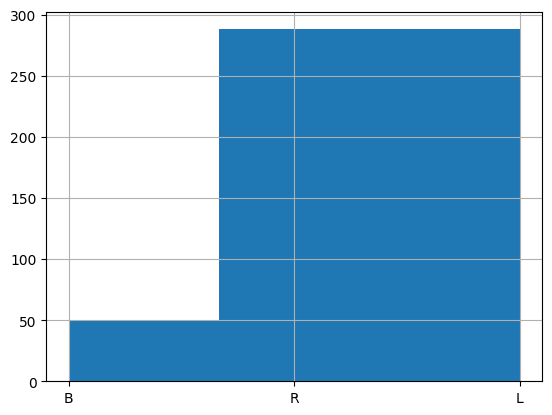

In [ ]:
"""
Ejercicio 7
Re-implemente el modelo del ejercicio 4 (Balance.csv) utilizando un Multiperceptrón Tensorflow/Keras.


"""




from google.colab import drive
drive.mount('/content/drive')

FUENTES_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes'
DATOS_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos'

import pandas as pd
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing, model_selection, metrics

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras import optimizers


from matplotlib import pyplot as plt
import plotly.express as px



#Importa DF

df = pd.read_csv(DATOS_DIR + "/Balance.csv")

df['Balance'].hist(bins=3)
df.head()



In [ ]:



#Normalizo
# %% separa atributos y clases
X_raw = np.array(df.iloc[:,1:])
Y_raw = np.array(df.iloc[:,0])

# Binarizador para convertir el nombre de la clase en one hot encoding
binarizer = preprocessing.LabelBinarizer()

# Binariza cada clase como una combinación de un 1 y 0s
Y_raw = binarizer.fit_transform(Y_raw)
# Y_raw==pd.get_dummies(df[' Balance']).to_numpy() # forma alternativa para codificar

print('Las clases del dataset son :', binarizer.classes_)
print(Y_raw)

# %% Separa ejemplos para enternamiento y testeo
TEST_SIZE = 0.3 # proporcion entre testeo entre entrenamiento y testeo
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_raw, Y_raw, test_size=TEST_SIZE)#, random_state=42)
print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(Y_train), len(Y_test) ))

# Escala los atributos de los ejemplo
scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MinMaxScaler()

X_train  = scaler.fit_transform( X_train )
X_test   = scaler.transform( X_test )

"""Entreno"""

# Definir las dimensiones de entrada y salida
ENTRADAS = X_train.shape[1]
SALIDAS  = Y_train.shape[1]
ocultas = 4

#Creo resumen de modelo
modelo = Sequential()
modelo.add(Input(shape=(ENTRADAS,)))
modelo.add(Dense(ocultas, activation='relu'))
modelo.add(Dense(SALIDAS, activation='softmax'))

modelo.summary()

#optimizador = optimizers.SGD(learning_rate=0.005)
optimizador = optimizers.Adam(learning_rate=0.005)
modelo.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics = ['accuracy'])

EPOCAS = 500 #es lo que antes poníamos como max_iteraciones
TAM_LOTE = 32 #sklearn pone uno por defecto, esto es diferente respecto a la solución anterior
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
history = modelo.fit(x=X_train, y=Y_train, batch_size=TAM_LOTE, epochs=EPOCAS, callbacks=[early_stop])



Las clases del dataset son : ['B' 'L' 'R']
[[1 0 0]
 [0 0 1]
 [0 0 1]
 ...
 [0 1 0]
 [0 1 0]
 [1 0 0]]

Datos de Entrenamiento: 437   Datos de Testeo: 188


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35 (140.00 B)

 Trainable params: 35 (140.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2523 - loss: 1.3864
Epoch 2/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3868 - loss: 1.0808 
Epoch 3/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4781 - loss: 0.9373 
Epoch 4/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6471 - loss: 0.8353 
Epoch 5/500


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7797 - loss: 0.7599 
Epoch 6/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8342 - loss: 0.6867  
Epoch 7/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8617 - loss: 0.5843 
Epoch 8/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8814 - loss: 0.5256 
Epoch 9/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8826 - loss: 0.4688 
Epoch 10/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8734 - loss: 0.4387 
Epoch 11/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8687 - loss: 0.4048 
Epoch 12/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8529 - loss: 0.3986 
Epoch 13/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8713 - loss: 0.3491 
Epoch 14/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8728 - loss: 0.3608 
Epoch 15/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8783 - loss: 0.3286 
Epoch 16/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

In [ ]:
# calcula las metricas precision, recall, f1-score y accuracy a partir de la matriz de confusion
# retorna tupla: ( precision, recall, f1_score, accuracy )
def calcular_metricas(conf_mat):
    precision = np.zeros(conf_mat.shape[0])
    for i in range(0, len(conf_mat)):
        precision[i] = conf_mat[i][i]/sum(conf_mat.T[i]) #Transpone para agarrar columna

    recall = np.zeros(conf_mat.shape[0])
    for i in range(0, len(conf_mat)):
        recall[i] = conf_mat[i][i]/sum(conf_mat[i]) #Fila

    f1_score = 2* (precision*recall) /(precision+recall)

    accuracy =  0
    for i in range(0, len(conf_mat)):
        accuracy+=conf_mat[i][i]
    accuracy/= conf_mat.sum()

    return ( precision, recall, f1_score, accuracy )

# el parámetro metricas es una tupla ( precision, recall, f1_score, accuracy )
def imprimir_metricas( metricas ):
    (precision, recall, f1_score, accuracy) = metricas
    print('\n clase   precision    recall    f1-score')
    for i in range(0, len(precision)):
        print('%5d %10.2f %10.2f %10.2f' % (i, precision[i], recall[i], f1_score[i]))
    print('\naccuracy: %6.2f\n' % accuracy)

In [ ]:
#  ########### Medición del entrenamiento ######################
Y_pred = modelo.predict(X_train)

# "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(Y_train)
Y_pred_it = binarizer.inverse_transform(Y_pred)

# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )

report = metrics.classification_report(Y_it, Y_pred_it)
print("Reporte SkLearn:\n%s" % report)
cm = metrics.confusion_matrix(Y_it, Y_pred_it)
print("Confusion matrix:\n%s" % cm)

#calcula métricas de forma manual
mt = calcular_metricas(cm)
imprimir_metricas(mt)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Efectividad:  99.31%
Reporte SkLearn:
              precision    recall  f1-score   support

           B       0.97      0.94      0.95        31
           L       1.00      1.00      1.00       204
           R       1.00      1.00      1.00       202

    accuracy                           0.99       437
   macro avg       0.99      0.98      0.98       437
weighted avg       0.99      0.99      0.99       437

Confusion matrix:
[[ 29   1   1]
 [  1 203   0]
 [  0   0 202]]

 clase   precision    recall    f1-score
    0       0.97       0.94       0.95
    1       1.00       1.00       1.00
    2       1.00       1.00       1.00

accuracy:   0.99



In [ ]:
"""
Ejercicio 8
Utilizando el archivo Iris.csv que contiene información referida a la longitud y al ancho de sépalos y pétalos
de tres especies de flores: iris setosa, iris versicolor e iris virginica.
a) Entrenar una multiperceptrón que aprenda a clasificar las 3 clases de flores.
b) Utilice Python para calcular la matriz de confusión y calcule de forma manual las métricas de precision,
recall, accuracy y f1-score. Luego utilice la función classification_report de SciKit-Learn para
comparar los resultados.

"""






from google.colab import drive
drive.mount('/content/drive')

FUENTES_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes'
DATOS_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos'

import pandas as pd
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing, model_selection, metrics

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras import optimizers


from matplotlib import pyplot as plt
import plotly.express as px



#Importa DF

df = pd.read_csv(DATOS_DIR + "/Iris.csv")
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:

#Normalizo
# %% separa atributos y clases
X = np.array(df.iloc[:,:-1])
Y = np.array(df.iloc[:,-1])

# Binarizador para convertir el nombre de la clase en one hot encoding
binarizer = preprocessing.LabelBinarizer()

# Binariza cada clase como una combinación de un 1 y 0s
Y = binarizer.fit_transform(Y)
# Y_raw==pd.get_dummies(df[' Balance']).to_numpy() # forma alternativa para codificar

print('Las clases del dataset son :', binarizer.classes_)
print(Y)

# %% Separa ejemplos para enternamiento y testeo
TEST_SIZE = 0.3 # proporcion entre testeo entre entrenamiento y testeo
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=TEST_SIZE)#, random_state=42)
print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(Y_train), len(Y_test) ))

# Escala los atributos de los ejemplo
scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MinMaxScaler()

X_train  = scaler.fit_transform( X_train )
X_test   = scaler.transform( X_test )

"""Entreno"""

# Definir las dimensiones de entrada y salida
ENTRADAS = X_train.shape[1]
SALIDAS  = Y_train.shape[1]
ocultas = 2

#Creo resumen de modelo
modelo = Sequential()
modelo.add(Input(shape=(ENTRADAS,)))
modelo.add(Dense(ocultas, activation='relu'))
modelo.add(Dense(SALIDAS, activation='softmax'))

modelo.summary()

#optimizador = optimizers.SGD(learning_rate=0.005)
optimizador = optimizers.Adam(learning_rate=0.005)
modelo.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics = ['accuracy'])

EPOCAS = 500 #es lo que antes poníamos como max_iteraciones
TAM_LOTE = 32 #sklearn pone uno por defecto, esto es diferente respecto a la solución anterior
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
history = modelo.fit(x=X_train, y=Y_train, batch_size=TAM_LOTE, epochs=EPOCAS, callbacks=[early_stop])



Las clases del dataset son : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5081 - loss: 0.8614
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6403 - loss: 0.8453 
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7073 - loss: 0.8117 
Epoch 4/500


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7323 - loss: 0.7614  
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7041 - loss: 0.7746 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6729 - loss: 0.7761  
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6708 - loss: 0.7384 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7062 - loss: 0.7128 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6781 - loss: 0.7389 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7093 - loss: 0.6828 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7406 - loss: 0.6663 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7329 - loss: 0.6904 
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7038 - loss: 0.6760 
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6652 - loss: 0.6911 
Epoch 15/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6934 - loss: 0.67

In [ ]:
# calcula las metricas precision, recall, f1-score y accuracy a partir de la matriz de confusion
# retorna tupla: ( precision, recall, f1_score, accuracy )
def calcular_metricas(conf_mat):
    precision = np.zeros(conf_mat.shape[0])
    for i in range(0, len(conf_mat)):
        precision[i] = conf_mat[i][i]/sum(conf_mat.T[i]) #Transpone para agarrar columna

    recall = np.zeros(conf_mat.shape[0])
    for i in range(0, len(conf_mat)):
        recall[i] = conf_mat[i][i]/sum(conf_mat[i]) #Fila

    f1_score = 2* (precision*recall) /(precision+recall)

    accuracy =  0
    for i in range(0, len(conf_mat)):
        accuracy+=conf_mat[i][i]
    accuracy/= conf_mat.sum()

    return ( precision, recall, f1_score, accuracy )

# el parámetro metricas es una tupla ( precision, recall, f1_score, accuracy )
def imprimir_metricas( metricas ):
    (precision, recall, f1_score, accuracy) = metricas
    print('\n clase   precision    recall    f1-score')
    for i in range(0, len(precision)):
        print('%5d %10.2f %10.2f %10.2f' % (i, precision[i], recall[i], f1_score[i]))
    print('\naccuracy: %6.2f\n' % accuracy)

In [ ]:
#  ########### Medición del entrenamiento ######################
Y_pred = modelo.predict(X_train)

# "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(Y_train)
Y_pred_it = binarizer.inverse_transform(Y_pred)

# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )

report = metrics.classification_report(Y_it, Y_pred_it)
print("Reporte SkLearn:\n%s" % report)
cm = metrics.confusion_matrix(Y_it, Y_pred_it)
print("Confusion matrix:\n%s" % cm)

#calcula métricas de forma manual
mt = calcular_metricas(cm)
imprimir_metricas(mt)

In [42]:
"""
Ejercicio 9

Utilizando los ejemplos del archivo AUTOS.csv genere un modelo utilizando un multiperceptrón para
predecir el precio del auto (atributo price) y la cantidad de millas por galón en ruta (MPG-highway) en
función del resto de los atributos. Recuerde completar los valores faltantes, utilizar normalización y dividir
el dataset en entrenamiento y validación (80/20).
Realice 20 ejecuciones independientes de cada configuración seleccionada calculando las épocas
promedio y al error cuadrático medio (ECM). Analice los resultados y respalde las afirmaciones referidas a
los resultados obtenidos. Utilice un máximo de 1000 épocas con lotes de 50 e implemente una parada
temprana con paciencia de 15.
Complete la siguiente tabla y realice un análisis de los valores obtenidos

"""






import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import chardet
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Input, LeakyReLU

from google.colab import drive
drive.mount('/content/drive')

nombre_archivo = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos/AUTOS.csv'



EJECUCIONES = 20

#ACTIVACION = 'tanh'
#ACTIVACION = 'sigmoid'
ACTIVACION = 'relu'
#ACTIVACION = LeakyReLU() #es la única función de activación que no la llamamos con un string, ver el resto:

#OPTIMIZADOR = 'sgd'
#OPTIMIZADOR = 'rmsprop'
OPTIMIZADOR = 'adam'



with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

df= pd.read_csv(nombre_archivo, encoding=result['encoding'])

#-- seleccionar los atributos numéricos --
df = df.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"])
df.head()
df.info()

values = {}
for column in df.columns:
    values[column] = df[column].mean()
print(values)

# reemplaza valores nulos por la media de cada variable
df = df.fillna(value=values)


datos = np.array(df)
print(datos)

attPred = [12,14] #12 mpg-highway y 14 precio  #-- nro de atributos a predecir
T = datos[:, attPred] # queremos predecir dos variables, por eso ponemos 2 directamnte en el T, luego tendremos 2 neuronas al final de la red
X = np.delete(datos, attPred, 1) # elimina columnas de atributos a predecir

data_scaler, target_scaler = StandardScaler(), StandardScaler()
X = data_scaler.fit_transform(X)
T = target_scaler.fit_transform(T)



EPOCAS = 1000 #lo que antes llamábamos max_iteraciones
TAM_LOTE = 50 #por default es 32

ENTRADAS = X.shape[1]
SALIDAS = len(attPred)#2

PACIENCIA = 15

model = Sequential()
model.add(Input(shape=(ENTRADAS,)))
model.add(Dense(6, activation=ACTIVACION))
model.add(Dense(3, activation= ACTIVACION))
model.add(Dense(SALIDAS))

model.summary()

# obtiene la arquitectura para el modelo y lo compila
model.compile(optimizer=OPTIMIZADOR, loss='mae', metrics = ['accuracy', 'mae', 'mse'])



cant_epocas = 0
ECMs = 0

for i in range(EJECUCIONES):
    #entreno
    x_train, x_val, y_train, y_val = train_test_split(X, T, test_size = 0.2,  shuffle = True)
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=PACIENCIA)
    history = model.fit(x = x_train, y = y_train, batch_size = TAM_LOTE, epochs = EPOCAS,
                  validation_data = (x_val, y_val), callbacks=[early_stop])

    #veo resultados con el train set
    pred = model.evaluate(x_train, y_train, verbose=0)
    ECMs += pred[2]
    cant_epocas += len(history.epoch)




print("Epocas promedio: ", cant_epocas/EJECUCIONES)
print("ECM promedio: ", ECMs/EJECUCIONES)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-ratio  205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64 

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 6)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 3)                   │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 2)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119 (476.00 B)

 Trainable params: 119 (476.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.3146 - loss: 0.9981 - mae: 0.9981 - mse: 1.7002 - val_accuracy: 0.3659 - val_loss: 0.9314 - val_mae: 0.9314 - val_mse: 1.5158
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3693 - loss: 0.9620 - mae: 0.9620 - mse: 1.5860 - val_accuracy: 0.3659 - val_loss: 0.9171 - val_mae: 0.9171 - val_mse: 1.4684
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3592 - loss: 0.9348 - mae: 0.9348 - mse: 1.4791 - val_accuracy: 0.3659 - val_loss: 0.9024 - val_mae: 0.9024 - val_mse: 1.4214
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3870 - loss: 0.9180 - mae: 0.9180 - mse: 1.4114 - val_accuracy: 0.3659 - val_loss: 0.8872 - val_mae: 0.8872 - val_mse: 1.3751
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3866 - loss: 0.8899 - mae: 0.8899 - mse: 1.3415 - val_accuracy: 0.3659 - val_loss: 0.8721 - val_mae: 0.8721 - val_mse: 1.3312
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms

In [ ]:
"""

Optimizador      Función activación        Épocas promedio       ECM Promedio
                    tanh                   45.55                  0.2596009485423565
                    sigmoid                76.55                  0.31662714183330537
                    ReLU                   35.85                  0.20261212587356567
SGD                 LeakyReLU              43.55                  0.23485352769494056


                    tanh                   25.7                    0.24083744883537292
                    sigmoid                54.3                    0.22820334509015083
                    ReLU                   24.8                    0.23643157705664636
RMSProp             LeakyReLU              27.6                    0.20710281580686568


                    tanh                   35.6                    0.22042452096939086
                    sigmoid                40.15                   0.2384445086121559
                    Relu                   34.75                   0.18609654307365417
Adam                LeakyReLU              29.35                   0.1902381084859371



Rta companero
Tenemos una red neuronal con 3 capas, donde cada una tiene 6, 3 y 2 neuronas respectivamente. Recordar que el sgd con momento es una buena forma para reducir
las osiclaciones del entrenamiento, bajando la cantidad de épocas necesarias y reduciendo el error. Lo mismo hacen las optimizaciones con rms y adam,
 solo que estas son más complejas y pueden tardar más y dar los mismos resultados que sgd con momento si es que estamos ante un modelo pequeño.
 En base a lo dicho anteriormente, y notando que las optimizaciones de rms y adam dieron resultados similares, podemos concluir que el modelo hecho es intermedio.
 Como es intermedio el optimizador con momento no es suficiente, mientras que las otras dos alternativas son más complejas y eficaces.
 """

In [ ]:
"""
Ejercicio 10
El conjunto de datos “Fingers” consiste en una serie de imágenes de 64x64 píxeles con fondo negro donde
en su centro se encuentra un mano que muestra una cantidad de dedos que va desde 0 a 5. La versión
original de este conjunto de imágenes se encuentra en https://www.kaggle.com/koryakinp/fingers
Muchas veces se utilizan técnicas de procesamiento de imágenes para obtener características
representativas (features extraction) de los objetos dentro de una imagen con el objetivo de simplificar el
problema, reducir la dimensionalidad y/o reducir el costo de procesamiento. Bibliotecas como OpenCV o
SciKit-Learn proveen funciones que permiten procesar imágenes y obtener valores estadísticos que
caracterizan los objetos.
a) Utilice la función regionprops de SciKitLearn con algunas imágenes de ejemplo del dataset para
experimentar con las distintas características que extrae de la imagen de la mano.
b) Implemente un script que convierta las imágenes en las carpetas “test” y “train” del dataset
“Fingers” en dos archivos (uno por carpeta) separados por comas (csv). De todas las características
que provee regionprops, tienen potencial aquellas que son independientes o se pueden independizar
de las unidades (píxeles). Algunas de estas características pueden ser:
• filled_area: cantidad de píxeles que contiene región (podría interpretarse como píxeles
cuadrados).
• major_axis_length: longitud (en píxeles) del eje mayor de la elipse que mejor se ajusta a la
región.
• minor_axis_length: longitud (en píxeles) del eje menor de la elipse que mejor se ajusta a la
región.
• perimeter: cantidad de píxeles que forman el contorne de la región.
• eccentricity: excentricidad de la elipse de mejor ajuste, cerca de 0 es un círculo, mientras que
cerca de 1 es una elipse más “larga”.
• solidity: razón entre la cantidad de píxeles de la región original y de la región convexa. Para
generar una región convexa se completan los pixeles de forma de eliminar regiones cóncavas de
una figura. La región convexa de una estrella de 5 puntas se convertirá en un pentágono al
completarla.
• extent: razón entre pixeles de la región original y el rectángulo que la contiene (bounding box).
c) Entrene un modelo de multiperceptrón a partir del archivo de entrenamiento generado en el punto
anterior.
d) Reflexione acerca de las propiedades geométricas generadas a partir de un objeto/región de una
imagen. ¿Cómo cree que afectaría la rotación, translación y escalado de un objeto/región dentro de la
imagen?

"""

Parcialito!!!

In [11]:
"""
A partir de todos los ejemplos del archivo Vinos.csv se entrenó un multiperceptrón con una sola capa oculta formada por 6 neuronas para predecir el tipo de vino
al que pertenece la muestra suministrada. Todos los ejemplos fueron normalizados utilizando media y desvío y empleados para el entrenamiento
(no se dividió en entrenamiento y testeo). La función de activación seleccionada fue la función ‘relu’, el valor de alfa utilizado fue 0.1,
la máxima cantidad de épocas se fijó en 30, la cota de error en 10e-05 y se determinó la generación de números aleatorios para la inicialización de pesos
y sesgos asignando al parámetro 'random_state' el valor 1. La configuración utilizada fue la siguiente:


clf = MLPClassifier(solver='sgd', learning_rate_init=0.1,

                 hidden_layer_sizes=(6, ), random_state=1,

                 max_iter=30, verbose=False,  tol=10e-05,

                 activation='relu')


Indique el valor de verdad de la siguiente afirmación:

"Al finalizar el entrenamiento, utilizando sklearn.neural_network.MLPClassifier() con los parámetros indicados previamente,
se pudo comprobar que el multiperceptrón entrenado era capaz de reconocer todos los ejemplos correctamente (accuracy=100%)”

V-F?

"""
from google.colab import drive
drive.mount('/content/drive')

FUENTES_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes'
DATOS_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos'

import sys
sys.path.append('/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes')


import pandas as pd
import numpy as np
import chardet
from matplotlib import pylab as plt
from sklearn import model_selection, preprocessing
from sklearn import metrics
from sklearn.neural_network import MLPClassifier






df = pd.read_csv(DATOS_DIR + "/Vinos.csv",sep=";")


#Convierte Clase para calcular
X= np.array(df.iloc[:,1:])  #Todas las columnas exceptuando la primera
T= np.array(df.iloc[:,:1])   #Solo la primer columna (Notar que esta despues de los :)
#print(X)
#print(X)

#Normalizo
binarizer = preprocessing.LabelBinarizer() #para el onehot enconding
T = binarizer.fit_transform(T)


scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MinMaxScaler()


X  = scaler.fit_transform( X )




#elijo parámetros de entrenamiento simialres a los que mostró el profe, siempre usando cosas que vimos por el momento. Aguante Relu loco

modelo = MLPClassifier(solver='sgd', learning_rate_init=0.1,
                 hidden_layer_sizes=(6, ), random_state=1,
                 max_iter=30, verbose=False,  tol=10e-05,
                 activation='relu').fit(X, T)




"""Prueba sobre entrenamiento"""
Y_pred = modelo.predict(X)
score = modelo.score(X, T)

# # "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(T)
Y_pred_it = binarizer.inverse_transform(Y_pred)

# Y_pred_it = np.argmax(Y_pred, axis = 1)

# calculo manual del accuracy
print("Prueba sobre entrenamiento")
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
print('      Score: %6.2f' % (score) )
#print(Y_pred_it)





df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Prueba sobre entrenamiento
Efectividad:  97.75%
      Score:   0.98


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
